In [1]:
import csv
import math
from os import walk

import matplotlib
import numpy
import matplotlib.pyplot as pyplot


def calc_partial_steam_pressure(temperature):
    return 6.112 * math.exp(
        (17.67 *
         (float(temperature) - 273.15))
        / (float(temperature) - 273.15 + 243.5))


def calc_e(relative_humidity, partial_steam_pressure):
    return float(relative_humidity) * float(partial_steam_pressure) / 100


def calc_ztd(partial_steam_steam_pressure, atmospheric_pressure, temperature):
    return 0.002277 \
           * (float(atmospheric_pressure) + (1255 / float(temperature)) + 0.05) \
           * float(partial_steam_steam_pressure)


def calc_g(geo_wdth, height, height_wrf):
    return float(9.8063) * (1 - (pow(10, -7) * (float(height_wrf)+float(height)) / 2)
                     * 1 - 0.0026373
                     * math.cos(2 * float(geo_wdth))
                     + 5.9
                     * pow(10, -6)
                     * pow(math.cos(2 * float(geo_wdth)), 2))


def calc_p_when_not_given(height, pressure, temperature, height_wrf, g):
    return float(pressure) \
           / (
               pow(
                   ((float(temperature) - 0.0065 * (float(height) - float(height_wrf)))
                    / float(temperature)),
                   (g * 0.0289644) / (8.31432 * 0.0065))
           )


def calc_for_file(file):
    csv_data = []
    csv_results = []
    with open(file) as csvFile:
        reader = csv.reader(csvFile, delimiter=',', quotechar='|')
        for row in reader:
            csv_data.append(row)

    for row in csv_data:
        needed_steam_pressure = 0
        if row[3] == "interp":
            needed_steam_pressure = row[12]
        elif row[3] == "2m":
            needed_steam_pressure = calc_p_when_not_given(
                row[8],
                row[12],
                row[10],
                row[9],
                calc_g(
                    row[4],
                    row[8],
                    row[9]
                )
            )

        out = calc_ztd(
            calc_partial_steam_pressure(row[10]),
            needed_steam_pressure,
            calc_e(
                row[11],
                calc_partial_steam_pressure(row[10])
            )
        )
        csv_results.append(out)

    return csv_results

f = []
for (dirpath, dirnames, filenames) in walk("daneLab02/"):
    f.extend(filenames)
    break

known_res = []
for var in f:
    known_res.append(calc_for_file("daneLab02/"+var))

counter = 0
for res in known_res:
    for x in range(0, 6 * counter):
        res.insert(0, 0.0)

length = known_res.__len__()
size = known_res.__sizeof__()

average = []
for x in range(0, size):
    val = 0
    counter = 0
    for y in range(0, length):
        test_elm=known_res[y][x]
        if test_elm == 0:
            break
        val += test_elm
        counter += 1

    if counter == 0:
        average.append(0)
        continue
    average.append(val/counter)

print(average)

x = numpy.linspace(0, 48, 500)
pyplot.plot(average)
pyplot.title('Tmp chart')
pyplot.show()

[41.44276876021052, 42.164064127355076, 40.62510693765901, 41.76179723112537, 40.575795896225664, 40.459155710232416, 49.33161947102719, 41.22825338714331, 40.80854889179438, 44.424622839655804, 42.645826199994985, 40.22445622278323, 46.37859095381047, 37.89136762423234, 46.764608210267774, 39.62426958406317, 45.450340272043036, 47.79348050009518, 49.61905099927207, 43.63634485045361, 40.43664396167374, 43.948566858421714, 35.22399147752792, 43.64605327498418, 40.95403742111037, 51.47667572327991, 45.96054589239383, 47.3587627358789, 44.02082632896936, 40.64162682993455, 42.41167123103012, 48.61814812208849, 39.915602527824525, 39.83654584120629, 38.41311883915395, 41.55193500456258, 44.13736762042444, 39.790430080929895, 39.96577841053027, 48.46881454465956, 45.9711896992764, 47.188470816528515, 48.32045975860933, 42.30141031384412, 40.47396209125451, 47.0747492220423, 46.25955056357528, 40.18204157717788, 43.95058634719339, 47.83938683736772, 47.83938683632017, 41.455895187890846, 49

<Figure size 640x480 with 1 Axes>

In [1]:
import main

main.start()

[41.44276876021052,
 42.164064127355076,
 40.62510693765901,
 41.76179723112537,
 40.575795896225664,
 40.459155710232416,
 49.33161947102719,
 41.22825338714331,
 40.80854889179438,
 44.424622839655804,
 42.645826199994985,
 40.22445622278323,
 46.37859095381047,
 37.89136762423234,
 46.764608210267774,
 39.62426958406317,
 45.450340272043036,
 47.79348050009518,
 49.61905099927207,
 43.63634485045361,
 40.43664396167374,
 43.948566858421714,
 35.22399147752792,
 43.64605327498418,
 40.95403742111037,
 51.47667572327991,
 45.96054589239383,
 47.3587627358789,
 44.02082632896936,
 40.64162682993455,
 42.41167123103012,
 48.61814812208849,
 39.915602527824525,
 39.83654584120629,
 38.41311883915395,
 41.55193500456258,
 44.13736762042444,
 39.790430080929895,
 39.96577841053027,
 48.46881454465956,
 45.9711896992764,
 47.188470816528515,
 48.32045975860933,
 42.30141031384412,
 40.47396209125451,
 47.0747492220423,
 46.25955056357528,
 40.18204157717788,
 43.95058634719339,
 47.83938683

In [2]:
var = main.start()
print(var)

[41.44276876021052, 42.164064127355076, 40.62510693765901, 41.76179723112537, 40.575795896225664, 40.459155710232416, 49.33161947102719, 41.22825338714331, 40.80854889179438, 44.424622839655804, 42.645826199994985, 40.22445622278323, 46.37859095381047, 37.89136762423234, 46.764608210267774, 39.62426958406317, 45.450340272043036, 47.79348050009518, 49.61905099927207, 43.63634485045361, 40.43664396167374, 43.948566858421714, 35.22399147752792, 43.64605327498418, 40.95403742111037, 51.47667572327991, 45.96054589239383, 47.3587627358789, 44.02082632896936, 40.64162682993455, 42.41167123103012, 48.61814812208849, 39.915602527824525, 39.83654584120629, 38.41311883915395, 41.55193500456258, 44.13736762042444, 39.790430080929895, 39.96577841053027, 48.46881454465956, 45.9711896992764, 47.188470816528515, 48.32045975860933, 42.30141031384412, 40.47396209125451, 47.0747492220423, 46.25955056357528, 40.18204157717788, 43.95058634719339, 47.83938683736772, 47.83938683632017, 41.455895187890846, 49

In [3]:
x = numpy.linspace(0, 48, 500)
pyplot.plot(main.start())
pyplot.title('Tmp chart')
pyplot.show()

NameError: name 'numpy' is not defined

In [5]:
x = numpy.linspace(0, 48, 500)
pyplot.plot(main.start())
pyplot.title('Tmp chart')
pyplot.show()

NameError: name 'numpy' is not defined

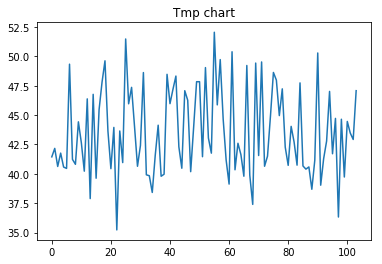

In [6]:

import matplotlib
import numpy
import matplotlib.pyplot as pyplot

x = numpy.linspace(0, 48, 500)
pyplot.plot(main.start())
pyplot.title('Tmp chart')
pyplot.show()